# 기본 Settings

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 사용
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

# pandas display 수 확장
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 60)

In [2]:
with open('./전국무료급식소표준데이터 (1).json',encoding='UTF8') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame.from_dict(data['records'])

In [4]:
# null 이 있는게 좀 있네?
# 도로명주소로 하는게 좋아보임
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시설명       1442 non-null   object
 1   소재지도로명주소  1442 non-null   object
 2   소재지지번주소   1359 non-null   object
 3   운영기관명     1442 non-null   object
 4   전화번호      1409 non-null   object
 5   급식장소      1442 non-null   object
 6   급식대상      1442 non-null   object
 7   급식시간      1442 non-null   object
 8   위도        1439 non-null   object
 9   경도        1439 non-null   object
 10  데이터기준일자   1442 non-null   object
 11  제공기관코드    1442 non-null   object
 12  제공기관명     1442 non-null   object
 13  급식요일      1390 non-null   object
 14  운영시작일자    1351 non-null   object
 15  운영종료일자    1160 non-null   object
dtypes: object(16)
memory usage: 180.4+ KB


# 중복된 데이터 처리

- 현재 몇개의 같은 row 가 중복되어서 들어가있다.
- 이는 담당자의 실수라고 판단된다. 즉 삭제하기로 하였다.

In [5]:
df.drop_duplicates(inplace= True)
df = df.reset_index()

# 시설명, 운영기관명 처리

- 아래와 같이 소재지 주소, 위/경도, 운영시작일자 모두 같음에도 시설명이 다른것이 존재한다.
- 시설명은 key 로서 적절하지 않다. 하지만 이때 왜 시설명이 다르지만 도로명 주소가 같은것일까?
    - http://www.asanin.kr/news/articleView.html?idxno=1357 를 참고하면 같은 급식소를 '돌아가면서' 운영하는 경우가 있음을 알 수 있다.
    - "아산무료경로급식소는 매주 월요일에는 따사모봉사단(단장 유영금), 화요일에는 아산시번영회(회장 신용호), 수요일에는 나눔과 기쁨(대표 김종기), 목요일에는 아산상록회(대표 김창래), 금요일에는 해피데이(노성웅 목사)가 맡아서 운영하고 있었다" 출처 : 아산IN(http://www.asanin.kr)
- 즉, 오표기가 아니라 맞는 표기이고 그저 돌아가면서 운영함을 의미한다.

- 기관별로 거의 운영은 하나정도만 이루어지고 있음

In [6]:
df['운영기관명'].value_counts().value_counts()

1     1003
2      141
3       13
4        8
5        3
6        3
10       1
11       1
Name: 운영기관명, dtype: int64

In [7]:
# 아래와 같이 같은 급식장소를 여러 시설명(단체) 들이 돌아가면서 운영하고있다.
df[df['소재지도로명주소'] == '충청남도 아산시 온천대로 1496']

,index,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
1227,1259,따사모 봉사단,충청남도 아산시 온천대로 1496,충청남도 아산시 온천동 56-9,따사모 봉사단,041-549-7477,온양온천역 하부공간 (월요일),"기초수급자 노인, 차상위계층 노인, 저소득 독거노인",중식(12:00~13:00),36.7804683,127.0034511,2020-09-14,4520000,충청남도 아산시,"2,3,4주 월",,
1228,1260,아산시번영회,충청남도 아산시 온천대로 1496,충청남도 아산시 온천동 56-9,아산시번영회,041-545-2009,온양온천역 하부공간 (화요일),"기초수급자 노인, 차상위계층 노인, 저소득 독거노인",중식(12:00~13:00),36.7804683,127.0034511,2020-09-14,4520000,충청남도 아산시,화,,
1229,1261,나눔과 기쁨 아산지부,충청남도 아산시 온천대로 1496,충청남도 아산시 온천동 56-9,나눔과 기쁨 아산지부,041-541-5080,온양온천역 하부공간 (수요일),"기초수급자 노인, 차상위계층 노인, 저소득 독거노인",중식(12:00~13:00),36.7804683,127.0034511,2020-09-14,4520000,충청남도 아산시,수,,
1230,1262,아산 상록회,충청남도 아산시 온천대로 1496,충청남도 아산시 온천동 56-9,아산 상록회,041-542-8893,온양온천역 하부공간 (목요일),"기초수급자 노인, 차상위계층 노인, 저소득 독거노인",중식(12:00~13:00),36.7804683,127.0034511,2020-09-14,4520000,충청남도 아산시,목,,
1231,1263,해피데이,충청남도 아산시 온천대로 1496,충청남도 아산시 온천동 56-9,해피데이,,온양온천역 하부공간 (금요일),"기초수급자 노인, 차상위계층 노인, 저소득 독거노인",중식(12:00~13:00),36.7804683,127.0034511,2020-09-14,4520000,충청남도 아산시,금,,


- 아래와 같이 교회, 경로당, 복지관에서 많은 운영을 하고 있음을 알 수 있었다.

In [8]:
pd.DataFrame({'교회': [sum(df['운영기관명'].str.contains('교회'))],
              '복지관': [sum(df['운영기관명'].str.contains('복지관'))],
              '경로당': [sum(df['운영기관명'].str.contains('경로당'))]})

,교회,복지관,경로당
0,118,502,86


- 운영기관명이나 시설명의 경우 매우 다양하기때문에 큰 정보를 구하기는 어려웠다.
- 위 정도의 정보만 뽑는정도로 마무리하는게 좋을듯 하다. 

# 소재지도로명주소


- 소재재지 도로명 주소가 같음에도 시설명이 다른것은, 같은 장소를 다른 업체에서 운영했기 떄문이다.

In [9]:
df[df['소재지도로명주소'] == '경기도 수원시 팔달구 덕영대로 924']

,index,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
1146,1178,한벗교회,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,한벗교회,031-296-4740,무한돌봄 정나눔터,노숙인,조식(07:30~08:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월+화+수+목+금+토,2014-01-28,
1147,1179,함께하는교회(광야119),경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,함께하는교회(광야119),031-254-2119,무한돌봄 정나눔터,노숙인,석식(19:30~20:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월+화+수+목+금+토,2014-01-28,
1148,1180,성령충만교회,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,성령충만교회,031-207-6683,무한돌봄 정나눔터,노숙인,석식(19:30~20:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월,2014-01-28,
1149,1181,사랑을 만드는사람들,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,사랑을 만드는사람들,031-207-6683,무한돌봄 정나눔터,노숙인,조식(07:30~08:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,첫째주 일+셋째주 일,2014-01-28,
1150,1182,송선화집사,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,송선화집사,031-207-6683,무한돌봄 정나눔터,노숙인,중식(12:00-13:00),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월,2014-01-28,


- 지번주소가 같은데, 도로명주소가 다른경우가 존재할까?

In [10]:
df.groupby('소재지지번주소')['소재지도로명주소'].nunique().value_counts() 

1     1081
2       27
82       1
Name: 소재지도로명주소, dtype: int64

존재하는듯 했지만, 아래와 같이 살펴본결과 아주 표기상의 오차일뿐 모두 일치했다.

In [11]:
#너무 많아서 스크롤을 길게 차지하는 관계로 주석처리.
#df_num = df.groupby('소재지지번주소')['소재지도로명주소'].nunique() >1
#df_address = df.groupby('소재지지번주소')['소재지도로명주소'].nunique()[df_num]
#for adrs in df_address.index:
#    display(df[df['소재지지번주소']==adrs])

- 즉 null 값이 없는 소재지 도로명주소를 대신 사용하도록 하였다.

- full 지번을 시도, 시군구, 기타 주소 세개로 나누어서 시각화가 용이하게 하였다.

In [12]:
address= pd.DataFrame(df['소재지도로명주소'].str.split(' ',3).tolist(),
            columns = ['시도','시군구','구로','기타'])
df = pd.concat([df,address],axis=1)

- 아래와 같이 시도에 이상한 데이터가 끼어있다. 
- 이를 보정하기 위해서 새로 고쳐주었다.

In [13]:
df['시도'].value_counts()[-4:]

충청남도홍성군    1
세종특별자치시    1
의정부시       1
           1
Name: 시도, dtype: int64

In [14]:
df['시도'] = df['시도'].replace(['','세종특별자치시','의정부시','충청남도홍성군'],['서울특별시','충청남도','경기도','충청남도'])

In [15]:
df[(df['시군구'] == '성남시') & (df['구로'] == '수정구')] 

,index,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자,시도,시군구,구로,기타
398,398,태평3동복지회관 경로식당,경기도 성남시 수정구 탄리로81번길7,경기도 성남시 수정구 태평동 3528,태평3동복지회관,031-753-4511,태평3동복지회관,저소득노인 및 결식노인,중식(11:30~13:00),37.4430176,127.1349943,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,탄리로81번길7
399,399,태평2동복지회관 경로식당,경기도 성남시 수정구 남문로111번길3,경기도 성남시 수정구 태평동 2645,태평2동복지회관,031-755-2018,태평2동복지회관,저소득노인 및 결식노인,중식(11:30~13:00),37.4477130,127.1386285,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,남문로111번길3
400,400,사랑의 손 경로식당,경기도 성남시 수정구 수정남로 142,경기도 성남시 수정구 신흥동 3444,사랑의 손 봉사단,031-756-0245,사랑의 손 봉사단,저소득노인 및 결식노인,중식(11:30~13:00),37.4433394,127.1432487,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,수정남로 142
401,401,태평1동복지회관 경로식당,경기도 성남시 수정구 성남대로1314,경기도 성남시 수정구 태평동 5118,태평1동복지회관,031-755-3677,태평1동복지회관,저소득노인 및 결식노인,중식(12:00~13:00),37.4472214,127.1271008,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,성남대로1314
495,495,수정중앙노인종합복지관 경로식당,경기도 성남시 수정구 성남대로1480번길38,경기도 성남시 수정구 복정동 666,수정중앙노인종합복지관,031-752-3366,수정중앙노인종합복지관,저소득노인 및 결식노인,중식(11:30~13:00),37.4615043,127.1304475,2020-06-30,3780000,경기도 성남시,월+화+수+목+금+토,,,경기도,성남시,수정구,성남대로1480번길38
496,496,태평4동 숯골 경로식당,경기도 성남시 수정구 남문로 134,경기도 성남시 수정구 태평동 7292,태평4동 숯골 경로식당,031-733-2111,태평4동 행정복지센터,저소득노인 및 결식노인,중식(11:30~12:30),37.4477024673,127.1414850277,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,남문로 134
599,599,수진1동복지회관 경로식당,경기도 성남시 수정구 탄리로17번길6,경기도 성남시 수정구 수진동 1921,수진1동복지회관,031-721-9977,수진1동복지회관,저소득노인 및 결식노인,중식(11:30~13:00),37.4384126,127.1387150,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,탄리로17번길6
601,601,산성종합사회복지관 경로식당,경기도 성남시 수정구 수정남로306번길15-16,경기도 성남시 수정구 산성동 563,산성종합사회복지관,031-746-0453,산성종합사회복지관,저소득노인 및 결식노인,중식(11:30~13:00),37.4557061,127.1537087,2020-06-30,3780000,경기도 성남시,월+화+수+목+금+토,,,경기도,성남시,수정구,수정남로306번길15-16
602,602,성남위례종합사회복지관 경로식당,경기도 성남시 수정구 위례광장로 311,경기도 성남시 수정구 창곡동 510(위례35단지),성남위례종합사회복지관,031-758-0704,성남위례종합사회복지관,저소득노인 및 결식노인,중식(11:00~13:00),37.4712270,127.1437360,2020-06-30,3780000,경기도 성남시,월+화+수+목+금,,,경기도,성남시,수정구,위례광장로 311
610,610,수정노인종합복지관 경로식당,경기도 성남시 수정구 수정남로268번길 28,경기도 성남시 수정구 산성동 2178,수정노인종합복지관,031-739-2912,수정노인종합복지관,저소득노인 및 결식노인,중식(11:30~13:00),37.4509426,127.1529600,2020-06-30,3780000,경기도 성남시,월+화+수+목+금+토,,,경기도,성남시,수정구,수정남로268번길 28


In [16]:
si = ['수원시']*4 + ['성남시']*3 +['안양시']*2 + ['부천시']*3 +['안산시']*2 + ['고양시']*3 +['용인시']*3 +['포항시']*2 +['전주시']*2 +['천안시']*2 +['청주시']*2 

In [17]:
goo = ['장안구','권선구','팔달구','영통구','수정구','중원구','분당구','만안구','동안구','원미구','소사구','오정구','상록구',
 '단원구','덕양구','일산동구','일산서구','처인구','기흥구','수지구','남구','북구','완산구','덕진구','동남구','서북구','상당구','흥덕구']

In [18]:
lis = list(zip(si,goo))
print(lis)

[('수원시', '장안구'), ('수원시', '권선구'), ('수원시', '팔달구'), ('수원시', '영통구'), ('성남시', '수정구'), ('성남시', '중원구'), ('성남시', '분당구'), ('안양시', '만안구'), ('안양시', '동안구'), ('부천시', '원미구'), ('부천시', '소사구'), ('부천시', '오정구'), ('안산시', '상록구'), ('안산시', '단원구'), ('고양시', '덕양구'), ('고양시', '일산동구'), ('고양시', '일산서구'), ('용인시', '처인구'), ('용인시', '기흥구'), ('용인시', '수지구'), ('포항시', '남구'), ('포항시', '북구'), ('전주시', '완산구'), ('전주시', '덕진구'), ('천안시', '동남구'), ('천안시', '서북구'), ('청주시', '상당구'), ('청주시', '흥덕구')]


In [19]:
df['구로'].value_counts()

상록구         46
단원구         32
완산구         16
담양읍         14
수정구         12
            ..
금성길          1
해보면          1
우이천로         1
망양로193번길     1
먹거리          1
Name: 구로, Length: 911, dtype: int64

In [20]:
for i in range(len(df)) :
    for j in range(len(lis)):
        if (df.loc[i,'시군구'] == lis[j][0]) & (df.loc[i,'구로'] == lis[j][1]) :
            df.loc[i,'시군구'] = df.loc[i,'시군구']+df.loc[i,'구로']

In [21]:
df[df['소재지도로명주소'].str.contains('양주시')]

,index,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자,시도,시군구,구로,기타
787,787,양주시옥정종합사회복지관 경로식당,경기도 양주시 옥정동로 258,"경기도 양주시 옥정동 1032, 옥정천년나무8단지","서정대학교 산학협력단, 양주시옥정종합사회복지관",031-868-9073,옥정종합사회복지관 내 수라방,60세 이상 기초생활수급 노인,11:00,37.8309483845,127.0994846124,2019-05-09,5590000,경기도 양주시,월~금,2019-01-01,2019-12-31,경기도,양주시,옥정동로,258
788,788,남면 무료경로식당(상수리),경기도 양주시 남면 화합로570번길 14,경기도 양주시 남면 상수리 320-1,대한적십자사봉사회 양주지구협의회,031-8082-5713,상수1리마을회관,60세 이상 기초생활수급 및 차상위 노인,11:00,37.8707185596,126.9925306663,2019-05-09,5590000,경기도 양주시,"매달 첫째,셋째 월",2019-01-14,2019-12-31,경기도,양주시,남면,화합로570번길 14
881,913,남면 무료경로식당(신산리),경기도 양주시 남면 개나리11길 48,경기도 양주시 남면 신산리 277-12,대한적십자사봉사회 양주지구협의회,031-8082-5713,남면노인분회,60세 이상 기초생활수급 및 차상위 노인,11:00,37.8977943985,126.972225,2019-05-09,5590000,경기도 양주시,"매달 둘째,넷째 월",2019-01-14,2019-12-31,경기도,양주시,남면,개나리11길 48
882,914,백석읍 무료경로식당,경기도 양주시 백석읍 양주산성로 581,경기도 양주시 백석읍 복지리 265-4,대한적십자사봉사회 양주지구협의회,031-8082-5713,MEET&BEER 식당,60세 이상 기초생활수급 및 차상위 노인,11:00,37.7869222485,126.989671,2019-05-09,5590000,경기도 양주시,목,2019-01-14,2019-12-31,경기도,양주시,백석읍,양주산성로 581
883,915,만송동 무료경로식당,경기도 양주시 고읍북로 117,경기도 양주시 만송동 707,대한적십자사봉사회 양주지구협의회,031-8082-5713,주내감리교회,60세 이상 기초생활수급 및 차상위 노인,11:00,37.7934529778,127.0872814862,2019-05-09,5590000,경기도 양주시,수,2019-01-14,2019-12-31,경기도,양주시,고읍북로,117
884,916,회정동 무료경로식당,경기도 양주시 평화로 1569,경기도 양주시 회정동 421-27,대한적십자사봉사회 양주지구협의회,031-8082-5713,대한노인회 양주시지회 3층,60세 이상 기초생활수급 및 차상위 노인,11:00,37.8294431542,127.0532058118,2019-05-09,5590000,경기도 양주시,월/목,2019-01-14,2019-12-31,경기도,양주시,평화로,1569
1299,1331,경천교회,경기도 남양주시 오남읍 진건오남로830번길 29-8,경기도 남양주시 오남읍 양지리 140-1,경천교회,031-593-1157,경천교회,저소득 취약계층 어르신,11:00 - 13:00,37.70190138,127.2033228,2020-07-03,3990000,경기도 남양주시,목,,,경기도,남양주시,오남읍,진건오남로830번길 29-8
1393,1425,남양주시노인복지관,경기도 남양주시 진건읍 진건오남로 359,경기도 남양주시 진건읍 송능리 109-17,남양주시노인복지관,031-573-6598,남양주시노인복지관,저소득 취약계층 어르신,11:00 - 13:00,37.67329989,127.1974955,2020-07-03,3990000,경기도 남양주시,월 ~ 금,,,경기도,남양주시,진건읍,진건오남로 359
1394,1426,남양주시동부노인복지관,경기도 남양주시 수동면 비룡로 801-47,경기도 남양주시 수동면 운수리 361,남양주시동부노인복지관,031-559-5880,남양주시동부노인복지관,저소득 취약계층 어르신,11:00 - 13:00,37.70971791,127.3205119,2020-07-03,3990000,경기도 남양주시,월 ~ 금,,,경기도,남양주시,수동면,비룡로 801-47
1395,1427,남양주시노인복지관(분관),경기도 남양주시 진접읍 해밀예당1로236번길 23,경기도 남양주시 진접읍 금곡리 1118,남양주시노인복지관(분관),031-573-0570,남양주시노인복지관(분관),저소득 취약계층 어르신,11:00 - 13:00,37.71895557,127.2050662,2020-07-03,3990000,경기도 남양주시,월 ~ 금,,,경기도,남양주시,진접읍,해밀예당1로236번길 23


# 소재지지번주소

- 만약 소재지 도로명 주소가 같으면 소재지 지번주소도 같아야 할 것이다.
- 하지만 그렇지 않은 경우가 존재했다.
    - 소재지 지번이 같음 -> 도로명 주소가 같음
    - 도로명 주소가 같음 -> 소재지 지번이 다를떄도 있음

In [22]:
# 소재지 도로명 주소가 같을때에 소재지 지번주소가 다른 데이터가 2개 존재한다.
df.groupby('소재지도로명주소')['소재지지번주소'].nunique().value_counts() 

1    1205
0      57
2       6
Name: 소재지지번주소, dtype: int64

In [23]:
df_num = df.groupby('소재지도로명주소')['소재지지번주소'].nunique() ==2
df.groupby('소재지도로명주소')['소재지지번주소'].nunique()[df_num]

소재지도로명주소
광주광역시 광산구 송정로 52번길 20(도산동)    2
광주광역시 남구 제중로 24-10(양림동)       2
대구광역시 북구 관음동로9길 10-25         2
대전광역시 서구 월평북로 11              2
서울특별시 강서구 개화동로21길 4           2
전라북도 군산시 백릉로 245              2
Name: 소재지지번주소, dtype: int64

- 아래의 경우 소재지 지번주소가 도로명주소와 다르다.
- 위/경도를 조사해본 결과 소재지 지번주소가 틀린것이였다.

In [24]:
df[df['소재지도로명주소']=='광주광역시 광산구 송정로 52번길 20(도산동)']

,index,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자,시도,시군구,구로,기타
812,812,광산구행복나루노인복지관,광주광역시 광산구 송정로 52번길 20(도산동),광주광역시 광산구 도산동883-28,광산구행복나루노인복지관,062-942-3663,광산구행복나루노인복지관,"독거노인, 결식노인, 저소득어르신 등",중식(11:30~12:30),35.134753,126.795358,2019-06-19,6290000,광주광역시,월~토,2017-01-01,NaN,광주광역시,광산구,송정로,52번길 20(도산동)
1253,1285,행복나루노인복지관,광주광역시 광산구 송정로 52번길 20(도산동),광주광역시 광산구 도산동 925-1,행복나루노인복지관,062-942-3663,행복나루노인복지관,결식우려가 있는 저소득층 노인,중식(11:40~12:40),35.1348590779,126.7951506782,2020-07-10,3630000,광주광역시 광산구,월~토(법정 공휴일제외),2020-01-01,2020-12-31,광주광역시,광산구,송정로,52번길 20(도산동)


- 소재지 지번주소는 쓰지 않기로 결정.

# 급식시간 처리

- 데이터가 워낙 더러운 상태였기 때문에, 형식이 매우 이상한 경우가 많았다.
- 이 경우를 모두 고려하면서 처리하기 위해서 아래와 같이 긴 처리과정이 필요했다.

## 공백 없애기

- 급식시간의 경우 담당자의 실수로 필요치않는 공백이 있는 경우가 많았다.
- dd:dd , dd :dd 등의 띄어쓰기로 인한 에러를 감안해야 하므로 공백을 없앤다

In [25]:
df['급식시간'] = df['급식시간'].str.replace(' ','')
df['급식시간'].head(n=10)

0            중식(11:30~12:30)
1            중식(11:00~12:00)
2            중식(11:30~12:30)
3            중식(11:30~12:30)
4            중식(11:30~12:30)
5            중식(11:30~12:30)
6                11:00~12:00
7                11:00~12:00
8    16:50~17:20+11:50~12:20
9                11:00~12:00
Name: 급식시간, dtype: object

## 형식 통일

- dd~dd 와 dd-dd 형식이 혼재되어있는 관계로 둘의 형식을 통일하기 위해서 - 를 ~ 로 바꾸어주자

In [26]:
df['급식시간'] = df['급식시간'].str.replace('-','~')

## dd~dd 형식 처리

- dd-dd / dd~dd 형식이 아닌 데이터가 얼마나 있는지 알아보자.

In [27]:
len(df['급식시간'])-sum(df['급식시간'].str.contains(r'(\d{2}:\d{2}~\d{2}:\d{2})',regex=True))

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


191

- 191 개 가량이 있는것을 볼 수 있다.
- 원래 데이터의 길이에 비하면 이정도는 어느정도 수작업이 가능해 보인다.

In [28]:
good = pd.DataFrame(df['급식시간'].str.findall('(\d{2}:\d{2}~\d{2}:\d{2})').tolist())
good

,0,1,2
0,11:30~12:30,None,None
1,11:00~12:00,None,None
2,11:30~12:30,None,None
3,11:30~12:30,None,None
4,11:30~12:30,None,None
...,...,...,...
1405,11:00~13:00,None,None
1406,11:30~12:30,None,None
1407,12:00~13:00,None,None
1408,10:30~11:30,None,None


- 위처럼 ~ 형식에 대해서 dataframe 을 만든다.
- 그 이후에 각 시간에 대해서 아침/점심/저녁에 해당하는 시간대를 추려서, 아침/점심/저녁으로 범주화해서 붙인다.

In [29]:
# 1이 나온 값은 바로 밑반찬 배달이다. 
mean_1 = (good[0].str[0:2].astype(float) + good[0].str[6:8].astype(float))/2 
mean_2 = (good[1].str[0:2].astype(float) + good[1].str[6:8].astype(float))/2 
mean_3 = (good[2].str[0:2].astype(float) + good[2].str[6:8].astype(float))/2 

- 이때에 시간대가 1 인경우가 있다. 이는 새벽 1시라는 이야기인데 말이 안되는 것이다.
- 조사해본 결과 이는 반찬배달의 경우였다. 그러므로 이는 배달로 구분하도록록 하겠다.
- 즉 pd.cut 에서 1의 범위에 해당하는 값은 배달로 처리

In [30]:
new_mean_1 = pd.cut(mean_1,[0,2,10,15,np.inf],labels = ['배달','아침','점심','저녁'])
new_mean_2 = pd.cut(mean_2,[0,2,10,15,np.inf],labels = ['배달','아침','점심','저녁'])
new_mean_3 = pd.cut(mean_3,[0,2,10,15,np.inf],labels = ['배달','아침','점심','저녁'])

- 이제, NAN 을 모두 공백으로 바꾼다.
- 그 이후 세 값들을 더해준다.(str)

In [31]:
new_mean_1 = new_mean_1.astype(str).fillna("")
new_mean_2 = new_mean_2.astype(str).fillna("")
new_mean_3 = new_mean_3.astype(str).fillna("")
cate_meal = new_mean_1 + new_mean_2 + new_mean_3

- 아래와 같이 Nan 이 나온 값 말고는 제공하는 시간이 모두 올바르게 나온것을 볼 수 있다.

In [32]:
cate_meal.value_counts()

점심        1120
           191
점심저녁        68
저녁          17
아침           4
점심점심         3
배달           3
저녁점심         2
아침점심저녁       1
점심저녁저녁       1
dtype: int64

In [33]:
df['급식'] = cate_meal

## 예외형식 처리

- 이제 위 경우에 대해 해당하지 않는 많은 경우들을 알아보자.
- 아래처럼 많은 경우가 있음을 알 수 있다.

In [34]:
exception = df[~df['급식시간'].str.contains(r'(\d{2}:\d{2}~\d{2}:\d{2})',regex=True)]
change = pd.DataFrame()
change['old'] = exception['급식시간'].unique()
change['new'] = ['점심','점심','점심','기타','점심','배달',
                 '아침저녁','점심','점심','점심',
                 '점심','점심','점심','점심','점심',
                 '중단','점심','점심','점심','점심',
                 '점심','점심','아침','점심','점심','점심','점심저녁','아침점심']
change

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,old,new
0,12:00,점심
1,12시,점심
2,점심,점심
3,주2회,기타
4,중식,점심
5,주1회(6일분)반찬배달,배달
6,오전(06:00)+오후(19:00),아침저녁
7,"주4회,15:00/토,12:00",점심
8,12시~13시,점심
9,중식(12:00),점심


- 위와 같이 old 에 해당하는 범주들을, 최대한 맞게 바꾸어 주었다.
- 그 이후 아래와 같이 df 의 급식 columns 에 위 처리 내용을 붙여넣었다.

In [35]:
ext = exception['급식시간'].replace(list(change['old']),list(change['new']))
df.loc[ext.index,'급식'] = ext
df['급식'].value_counts()

점심        1292
점심저녁        69
저녁          17
배달          15
아침           5
점심점심         3
저녁점심         2
기타           2
아침점심저녁       1
아침점심         1
점심저녁저녁       1
중단           1
아침저녁         1
Name: 급식, dtype: int64

## 마지막 처리

- 점심점심 -> 점심
- 점심저녁저녁 -> 점심저녁

In [36]:
df['급식'] = df['급식'].replace(['점심점심','점심저녁저녁'],['점심','점심저녁'])
df['급식'].value_counts()

점심        1295
점심저녁        70
저녁          17
배달          15
아침           5
저녁점심         2
기타           2
아침점심저녁       1
아침점심         1
중단           1
아침저녁         1
Name: 급식, dtype: int64

- 대부분 점심이 제일 많고, 아침과 저녁의 경우는 현저하게 적다.

In [37]:
df = pd.concat([df,pd.DataFrame({'아침': df['급식'].str.contains('아침')*1,
                                 '점심': df['급식'].str.contains('점심')*1,
                                 '저녁': df['급식'].str.contains('저녁')*1})],axis=1)

# 급식 요일 처리

## nan 처리

- 급식 시간이 아예 없는 경우가 있었다. 
- nan 이 많지 않으므로 어려운 nan 처리방법 보다는 그냥 최빈값으로 채우는것이 좋아보였다.
- 그러므로 월화수목금 으로 채우도록 하겠다.

In [38]:
df['급식요일']= df['급식요일'].fillna('월화수목금')

- 급식 요일을 보았을때, 키워드는 월/화/수/목/금/토/일/매일/월~토 등으로 처리가 되어있음을 알 수 있다.
- 매우 형식이 제각각이라 하나하나 처리할수는 없었고, 대표적인 경우로 나누어서 최대한 정확하게 많은 가짓수를 포함하려 하였다.

In [39]:
df[['월','화','수','목','금','토','일']] = 0

- 우선 위와 같이 월,화,수,목,금,토,일 의 col 을 만들어서, 그 날에 급식을 하는날 이라고 표시하려 하였다.

In [40]:
df['급식요일'].value_counts()

월+화+수+목+금                                             395
월+화+수+목+금+토                                           145
월~금                                                    98
월,화,수,목,금                                              67
월~토                                                    62
월화수목금                                                  55
매일                                                     28
토                                                      17
화                                                      17
목                                                      17
월, 화, 수, 목, 금                                          16
월~금(5일)                                                14
주1회(6일분) 반찬배달                                          12
수                                                      12
월수금                                                    11
월+수+금                                                  11
월~금(토요일 대체식 지급)                                        11
주3회           

- 월-금 과 월~금 은 같은 의미이다.
- 즉 월-금 형식을 월~금 형식으로 ~를 넣어서 통합시키자.
- 그리고 띄어쓰기를 공백이 없게 처리하자.

In [41]:
df['급식요일'] = df['급식요일'].str.replace(' ','')
df['급식요일'] = df['급식요일'].str.replace('-','~')
df['급식요일'] = df['급식요일'].str.replace('～','~')

## ~ 처리 (from - to)

- ~ 를 포함하는 경우는 아래와 같았다.
- 아니 근데 ～ 처럼 위 ~ 가 포함되어있는 경우도 있었다. 글씨체에 따라서 ~ 와 ～ 가 구분된다고한다. 

In [42]:
from_to = df[df['급식요일'].str.contains('~',na=False)]['급식요일'].unique()
from_to # ~를 포함하는 경우는 아래와 같다.

array(['월~금', '월~토', '주5회(월~금)', '주6회(월~토)', '월~금(5일)', '주5회(월~토중수요일제외)',
       '화~토', '매주월~금', '월~금(주5회)', '매주월~토', '중식(매주수요일)+석식(월~금)',
       '월~금(토요일대체식지급)', '월~일(주7회)', '월,화,수,목,금,(토~금요일지원)', '주5일(월~금요일)',
       '월~일', '월~화', '주6일(월~토)', '주5일(월~금)', '중식(월~금)+석식(매일)',
       '월~토(법정공휴일제외)', '10월~11월(주1회)', '월~토요일', '월~금요일', '화요일~금요일',
       '중식:1~4째주수요일석식:토요일제외매일'], dtype=object)

In [43]:
change = pd.DataFrame()
change['old'] = from_to
change['new'] = ['월화수목금','월화수목금토','월화수목금','월화수목금토','월화수목금','월화목금토',
                '화수목금토','월화수목금','월화수목금','월화수목금토','월화수목금',
                '월화수목금토','월화수목금토일','월화수목금토','월화수목금',
                '월화수목금토일','월화','월화수목금토','월화수목금','월화수목금토일',
                '월화수목금토','기타','월화수목금토','월화수목금','화수목금토',
                '월화수목금일']
change

,old,new
0,월~금,월화수목금
1,월~토,월화수목금토
2,주5회(월~금),월화수목금
3,주6회(월~토),월화수목금토
4,월~금(5일),월화수목금
5,주5회(월~토중수요일제외),월화목금토
6,화~토,화수목금토
7,매주월~금,월화수목금
8,월~금(주5회),월화수목금
9,매주월~토,월화수목금토


In [44]:
df['급식요일'] = df['급식요일'].replace(list(change['old']),list(change['new']))

- 위 표와 같이 원래 old열의 값들(원래 dataframe)을 new 열의 값으로 대체하겠다.

In [45]:
df['급식요일'].value_counts()

월+화+수+목+금                                           397
월화수목금                                               201
월+화+수+목+금+토                                         145
월화수목금토                                              100
월,화,수,목,금                                            83
매일                                                   28
목                                                    17
화                                                    17
토                                                    17
수                                                    12
월,화,수,목,금,토                                          12
주1회(6일분)반찬배달                                         12
월수금                                                  11
월+수+금                                                11
주3회                                                  10
월+화+수+목+금(주중)                                        10
금                                                     8
매주수요일                                           

## 월요일 처리

- 먼저 '월' 이라는 str 이 들어가있는 경우에, 매월,d월, 등이 들어가 있으므로 이를 제외하면 아래와 같은 경우가 남는다.
- 즉 아래와 같은 경우 월요일 변수에 1을 넣도록 하자.

In [46]:
# 월요일의 index 로, 예외사항을 '' 으로 replace 한 뒤에, 월요일이 contains 되어있는지를 검사하였다.
mon = df['급식요일'].str.replace('\d+월|매월|월\d+회|평일|요일|\d+일','',regex = True).str.contains('월',na=False)
df[mon]['급식요일'].unique()

array(['월화수목금', '월+화+목+금+토+일', '월+화+수+목+금+토', '월화수목금토', '월+화+수+목+금',
       '월+수+금', '월,화,수,목,금', '월+화+수+금+토+일', '월+화+수+목+금(주중)',
       '화+목(2째주월+화+수+목+금)', '주1일(월)', '월+화+수+목', '월', '월,금',
       '월,목:횡성읍/화,금:갑천,공근서원', '월,화,수,목,금,토', '월,화,목,금,토,일', '월화금토',
       '월화목금토', '월수금', '월+목+금', '월,화,목,금.토', '월,수,금', '월,화,수,금',
       '월,수,금,일', '경로식당(월,화,수,목,금,토),식사배달(월,화,수,목,금,토,일),밑반찬배달(월,목)',
       '경로식당(월,화,수,목,금,토),식사배달(월,화,수,목,금,토,일),밑반찬배달(화,목)', '월.화.수.목.금',
       '월.화.수.목.금.토', '경로식당(월,화,수,목,금,토)',
       '경로식당(월,화,수,목,금,토),식사배달(월,화,수,목,금,토,일)',
       '식사배달(월,화,수,목,금,토,일),밑반찬배달(월,목)', '월+목', '월+화+수+목+금+토+일',
       '주3일(월,수,금)', '월+화+목', '월∼토', '경로식당(월,화,수,목,금,토),밑반찬배달(화,목)',
       '식사배달(월,화,수,목,금,토,일)', '월화수목금토일', '월+금', '매달첫째,셋째월',
       '월+화+수+목+금+토(토요일자체운영)', '매달둘째,넷째월', '월/목', '주3회(월,수,금)',
       '주4회(월,화,수,목)', '주5회(월,화,수,목,금)', '월화', '월,수', '월,수,목',
       '월+화+목+금+토', '중식(주7회)+석식(월,화,목,토)+석식(수,금,일)', '매월마지막주월요일', '매주월요일',
       '월+화+수+토', '월+화+수+목+금+일', '월+화+목+금', '2,

In [47]:
df.loc[mon,'월'] = 1

## 화~토 처리

- 화~토 의 경우 contains 로 처리해도 별 다른 issue 가 없었다.
- 그러므로 아래와 같이 contains 로 처리하기로 하였다.

In [48]:
df.loc[df['급식요일'].str.contains('화',na=False),'화'] = 1
df.loc[df['급식요일'].str.contains('수',na=False),'수'] = 1
df.loc[df['급식요일'].str.contains('목',na=False),'목'] = 1
df.loc[df['급식요일'].str.contains('금',na=False),'금'] = 1
df.loc[df['급식요일'].str.contains('토|주말',na=False),'토'] = 1

## 일요일 처리

- 일요일의 경우 ~요일,휴일 등의 경우가 있어서 처리를 해 주어야 한다.

In [49]:
sun = df['급식요일'].str.replace('요일|매일|\d일|평일|포함일|째일|공휴일','',regex = True).str.contains('일|주말',na=False)
df[sun]['급식요일'].unique()

array(['월+화+목+금+토+일', '목+일', '월+화+수+금+토+일', '월,화,목,금,토,일',
       '화수목금(조식,석식).일(중식,석식)', '화+목+일', '연중(토,일.공휴일제외,8월혹서기4주제외)',
       '월,수,금,일', '경로식당(월,화,수,목,금,토),식사배달(월,화,수,목,금,토,일),밑반찬배달(월,목)',
       '경로식당(월,화,수,목,금,토),식사배달(월,화,수,목,금,토,일),밑반찬배달(화,목)',
       '경로식당(월,화,수,목,금,토),식사배달(월,화,수,목,금,토,일)',
       '식사배달(월,화,수,목,금,토,일),밑반찬배달(월,목)', '수+일', '월+화+수+목+금+토+일', '일',
       '주말,공휴일', '식사배달(월,화,수,목,금,토,일)', '토+일', '월화수목금토일', '목+금+일', '일요일',
       '조식(수+목+금+일)', '중식(주7회)+석식(월,화,목,토)+석식(수,금,일)', '홀수일', '첫째주일+셋째주일',
       '월+화+수+목+금+일', '화+수+금+토+일+코로나19관련현재미운영', '화+금+일(1+2+7+8월제외)',
       '월화수목금일', '화+일'], dtype=object)

- 위의 경우는 모두 일요일이 들어있다고 생각할 수 있다.
- 그러므로 위의 경우 일요일에 1 을 넣도록 하자.

In [50]:
df.loc[sun,'일'] = 1

# 급식대상 처리

- 아래와 같이 급식 대상에 대한 단어들을 추출해 본 뒤, 상위 20개를 살펴보았다.
- 아래와 같이 대부분 노인에 대해서 매우 집중되어 있음을 알 수 있다.

In [51]:
df['급식대상'].str.extractall('(\w+)')[0].value_counts().head(n=20)

노인       479
저소득      351
이상       316
독거노인     281
결식노인     228
저소득층     204
60세이상    185
60세      184
등        168
어르신      161
및        158
결식우려     134
65세이상    110
있는        98
차상위       94
저소득노인     92
차상위계층     91
만60세      84
만         81
기초수급자     81
Name: 0, dtype: int64

- 직접 살펴본 경우에도, 대부 분 노인에 집중되어 있다.

In [52]:
df['급식대상'].value_counts().head(n=10)

결식아동                      65
65세이상 저소득층                58
독거노인                      37
결식노인                      32
독거노인, 결식노인, 저소득어르신 등      32
독거노인, 결식노인 등              28
만 60세 이상 노인               26
저소득노인                     26
60세이상 저소득 결식우려 노인         23
만 60세이상 저소득 노인, 독거노인 등    22
Name: 급식대상, dtype: int64

모든 유형을 살펴본 결과 아래와 같은 타입이 '노인' 만을 대상으로 하지 않는 급식소였다.
- 노인을 제외한 다른 대상에 대해서 살펴본 결과 아래와 같았다.
- 결식아동
- 결식노인,저소득층
- 기초생활수급자, 차상위 계층 및 저소득 독거어르신
- 저소득 및 소외계층
- 취약계층
- 저소득 및 결식노인
- 저소득층등
- 독거노인, 결식노인, 저소득층, 차상위계층 등
- 무료: 수급자,차상위 어르신실비: 만 60세이상 관내 어르신
- 누구나
- 기초수급 및 저소득층
- 기초생활수급자, 차상위, 노인맞춤돌봄
- 기초생활수급자, 차상위, 독거노인
- 수급자,차상위,기타저소득(밑반찬배달)
- 저소득 장애인
- 국가유공자, 국민기초생활수급자, 장애인 등
- 장애인
- 회원가입(국민기초)
- 경로식당 무료급식을 이용하지 못하는 거동이 불편한  60세 이상 노인분 중  기초수급자 및 차상위계층, 저소득 독거노인 중에서 시설에서 대상자 상담을 통해 지정된 분에 한해서(이용권발급) 무료급식지원
- 저소득층, 수급자
- 수급자,차상위,기타저소득(경로식당,식사배달,밑반찬배달)
- 저소득층 아동
- 결식노인 및 취약계층
- 독거노인,조손가정, 장애인가정등

위 경우들은 대상이 '노인만' 이 아닌 경우이다. 이를 표현하기 위해 '노인만 대상' 이라는 columna 에 0 으로 넣자.

In [53]:
target = [
'결식아동',
'결식노인,저소득층',
'기초생활수급자, 차상위 계층 및 저소득 독거어르신',
'저소득 및 소외계층',
'취약계층',
'저소득 및 결식노인',
'저소득층등',
'독거노인, 결식노인, 저소득층, 차상위계층 등',
'무료: 수급자,차상위 어르신실비: 만 60세이상 관내 어르신',
'누구나',
'기초수급 및 저소득층',
'기초생활수급자, 차상위, 노인맞춤돌봄',
'기초생활수급자, 차상위, 독거노인',
'수급자,차상위,기타저소득(밑반찬배달)',
'저소득 장애인',
'국가유공자, 국민기초생활수급자, 장애인 등',
'장애인',
'회원가입(국민기초)',
'경로식당 무료급식을 이용하지 못하는 거동이 불편한  60세 이상 노인분 중  기초수급자 및 차상위계층, 저소득 독거노인 중에서 시설에서 대상자 상담을 통해 지정된 분에 한해서(이용권발급) 무료급식지원',
'저소득층, 수급자',
'수급자,차상위,기타저소득(경로식당,식사배달,밑반찬배달)',
'저소득층 아동',
'결식노인 및 취약계층',
'독거노인,조손가정, 장애인가정등']

In [54]:
df['노인만 대상'] = (~df['급식대상'].isin(target))*1 

# 운영 시작일자 처리

- NAN 값과 '' 값이 섞여있다.
- 종료일자가 없거나, 21년 보다 한참 이후인 날짜로 되어있는것은 아직까지 운영중임을 의미한다.
- 대부분 01-01 으로 되어있었다. 구체적인 날짜가 크게 도움이 되지 않는다고 판단, 년도만 나타내기로 하였다.

In [55]:
df['운영시작일자'].value_counts()

              296
2020-01-01    131
2017-01-01    126
2018-01-01    110
2019-01-01     78
             ... 
2007-08-10      1
2010-02-17      1
2005-04-11      1
2018-05-29      1
2001-08-20      1
Name: 운영시작일자, Length: 354, dtype: int64

- 빈칸 및 nan 값은 버린 상태에서 시각화를 진행하였다.

In [56]:
df['운영시작'] = df['운영시작일자'].str[0:4].fillna('0').replace('','0')

In [57]:
idx = df['운영시작일자'].str[0:4].fillna('0').replace('','0').unique().astype('str')
idx.sort() # index 정렬
idx = idx[1:] # nan 과 빈칸의 처리는 없앴다.
df['운영시작일자'].str[0:4].value_counts()[1:][idx.astype(str)]

1986      1
1988      1
1989      1
1991      1
1992     11
1993      6
1994     17
1995      5
1996     23
1997     17
1998     11
1999     26
2000     25
2001     16
2002     15
2003     12
2004     18
2005     14
2006     19
2007     24
2008     22
2009     15
2010     28
2011     21
2012     18
2013     10
2014     36
2015     28
2016     33
2017    154
2018    115
2019    108
2020    172
Name: 운영시작일자, dtype: int64

- 운영 시작 일자는 대부분 최근에 위치하고 있다.

In [58]:
df['운영시작일자'].value_counts()

              296
2020-01-01    131
2017-01-01    126
2018-01-01    110
2019-01-01     78
             ... 
2007-08-10      1
2010-02-17      1
2005-04-11      1
2018-05-29      1
2001-08-20      1
Name: 운영시작일자, Length: 354, dtype: int64

In [59]:
df['운영시작일자'].isnull().sum() + np.sum(df['운영시작일자'] == '')

387

<BarContainer object of 33 artists>

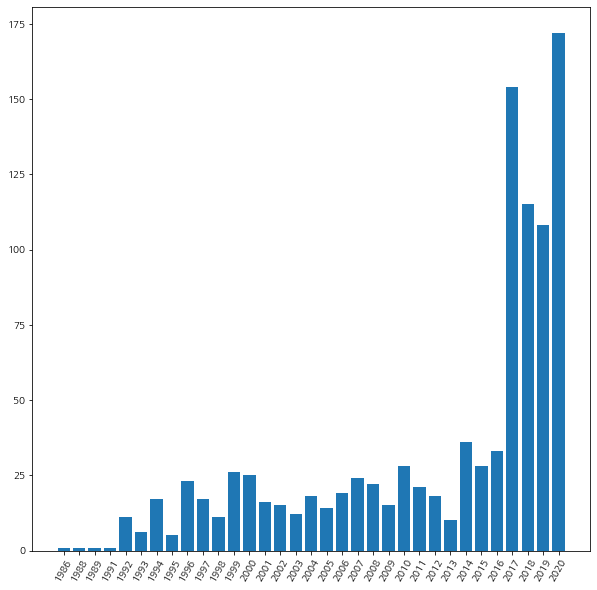

In [60]:
plt.figure(figsize = (10,10))
plt.xticks(rotation=60)
plt.bar(idx.astype(str), df['운영시작일자'].str[0:4].value_counts()[1:][idx])

# 운영 종료일자 처리

- 2025, 2099, 2050 의 데이터가 몇개 있었으나, 그 수가 많지 않고 운영 종료일자가 저렇게 먼 시기까지 정확히 지켜지지 않을것 같아서 제외하였다.
- na, '' 날짜들은 아직 구체적으로 운영 종료일자가 정해지지 않았다고 생각할 수 있다.
- 그에 따라서 아래와 같이 운영 종료일자에 대해 나타낼 수 있었다.

In [61]:
df['운영종료년도'] = df['운영종료일자'].str[0:4].fillna('0').replace(['','2050','2099','2025'],['0','0','0','0'])

In [62]:
idx = df['운영종료일자'].str[0:4].fillna('0').replace(['','2050','2099','2025'],['0','0','0','0']).unique().astype('str')
idx.sort() # index 정렬
idx = idx[1:] # nan 과 빈칸의 처리는 없앴다.
df['운영종료일자'].str[0:4].value_counts()[1:][idx.astype(str)]

2016      3
2017     81
2018     59
2019    134
2020    164
2021    105
Name: 운영종료일자, dtype: int64

<BarContainer object of 6 artists>

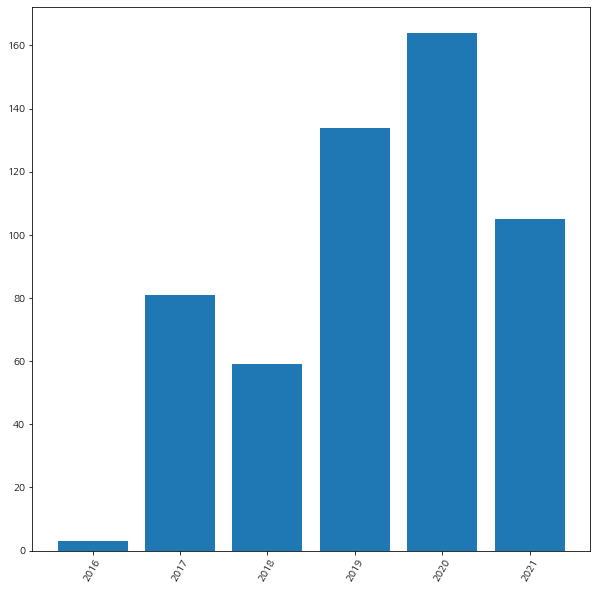

In [63]:
plt.figure(figsize = (10,10))
plt.xticks(rotation=60)
plt.bar(idx.astype(str), df['운영종료일자'].str[0:4].value_counts()[1:][idx])

# dropping

In [65]:
tt = df.copy() 

In [66]:
df = tt.copy()

In [59]:
df = df.drop(columns = ['시설명','소재지지번주소','운영기관명','전화번호','급식장소','급식요일',
                        '급식대상','급식시간','데이터기준일자','제공기관명','index','운영시작일자',
                        '운영종료일자','제공기관코드','급식'])

# 시각화전 전처리

## 폐업구분

- 시각화는 '현재 운영되고 있는 급식소' /  '폐업한 급식소' / 폐업할 급식소 ㅠㅠ
로 나누어보도록 하겠다.

In [67]:
df.loc[~df['운영종료년도'].isin(['0','2021']),'폐업'] = '폐업'
df.loc[df['운영종료년도'].isin(['0','2021']),'폐업'] = '운영'

In [68]:
df_open = df[df['운영종료년도'].isin(['0','2021'])]
df_closed = df[~df['운영종료년도'].isin(['0','2021'])] # 폐업은 2021,0 이 아닌 급식소
df_2021 = df_closed = df[~df['운영종료년도'].isin(['2021'])] # 2021 년까지만 운영을 하는 '곧 폐업'

## 요일별합

In [69]:
df['급식일']= df['월'] + df['화'] + df['수'] + df['목'] + df['금'] + df['토'] + df['일']

## Tableau 를 위한 파일 내보내기

In [65]:
df.to_csv('vis.csv')

In [66]:
df.to_csv('final_raw.csv')

# 시각화

## 각 지역별 급식소 폐업 / 운영 현황

- 각 지역별 폐업 / 운영중 현황을 알아보자.

In [67]:
df_2021

,소재지도로명주소,위도,경도,시도,시군구,기타,아침,점심,저녁,월,화,수,목,금,토,일,노인만 대상,운영시작,운영종료년도,폐업
0,서울특별시 강남구 광평로 56길 11,37.4879790845,127.1056313773,서울특별시,강남구,광평로 56길 11,0,1,0,1,1,1,1,1,0,0,1,0,0,운영
1,서울특별시 강남구 양재대로 55길 10,37.4931558395,127.0909926420,서울특별시,강남구,양재대로 55길 10,0,1,0,1,1,1,1,1,0,0,1,0,0,운영
2,서울특별시 강남구 헌릉로590길 88,37.4628770239,127.1014454587,서울특별시,강남구,헌릉로590길 88,0,1,0,1,1,1,1,1,0,0,1,0,0,운영
3,서울특별시 강남구 개포로124길 24,37.4931977652,127.0830002458,서울특별시,강남구,개포로124길 24,0,1,0,1,1,1,1,1,0,0,1,0,0,운영
4,서울특별시 강남구 개포로 109길 5,37.4923311992,127.0745908046,서울특별시,강남구,개포로 109길 5,0,1,0,1,1,1,1,1,0,0,1,0,0,운영
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,경상남도 사천시 용현면 용치로 12,35.0119857209,128.0630703276,경상남도,사천시,용현면 용치로 12,0,1,0,0,1,0,0,0,0,0,1,2017,0,운영
1406,서울특별시 구로구 개봉로20길 91-10,37.49311155,126.860017,서울특별시,구로구,개봉로20길 91-10,0,1,0,0,1,0,0,0,0,1,1,2012,0,운영
1407,서울특별시 구로구 남부순환로 1307,37.47879746,126.896075,서울특별시,구로구,남부순환로 1307,0,1,0,1,1,1,1,1,1,0,1,2012,0,운영
1408,서울특별시 구로구 디지털로19길 24,37.48079937,126.889897,서울특별시,구로구,디지털로19길 24,0,1,0,0,1,1,1,0,0,0,1,2007,0,운영


In [68]:
def open_def(x):
    return sum(x=='운영')
def closed_def(x):
    return sum(x=='폐업')
def soon_closed_def(x):
    return sum(x=='2021')
idx = df['시도'].value_counts()[::-1].index   
open_store = df['폐업'].groupby(df['시도']).agg(open_def)[idx]
closed_store = df['폐업'].groupby(df['시도']).agg(closed_def)[idx]
soon_closed_store = df['운영종료년도'].groupby(df['시도']).agg(soon_closed_def)[idx]

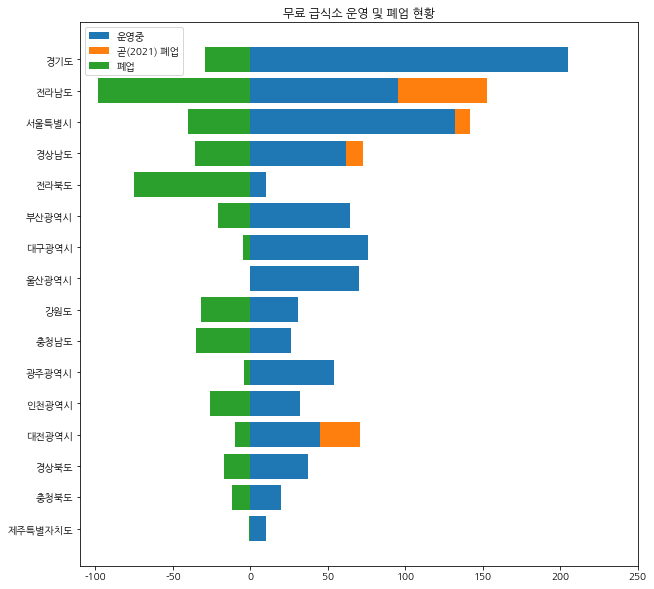

In [69]:
plt.figure(figsize = (10,10))
plt.barh(idx,open_store,label = '운영중')
plt.barh(idx,soon_closed_store,left = open_store,label = '곧(2021) 폐업' )
plt.barh(idx,-closed_store,label = '폐업')
plt.legend() 
plt.title('무료 급식소 운영 및 폐업 현황')
plt.xlim(-110,250);

- 폐업률이 높은 지역이 눈에 띤다. 왜 이런 상황이 일어났는지를 알아보아야할 것 같다.
- 전라북도의 경우 인구에 비해 너무 적다.
- 전라남도의 경우 2021년에 문을 닫는 급식소가 너무 많다. 계속되는 폐업가 어떤 관련이 있어보인다.

## 급식일 수
- '급식소 수' 만이 중요한것이 아니라 얼마나 '많은' 급식을 하는지가 중요할것이다.

In [70]:
meal=pd.DataFrame({'아침':[sum(df['아침'])],
                   '점심':[sum(df['점심'])],
                   '저녁':[sum(df['저녁'])]})

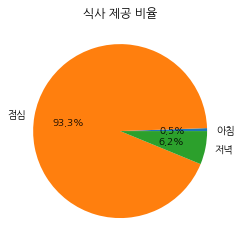

In [71]:
plt.pie(meal.values[0],
       labels = meal.columns,
       autopct='%1.1f%%') 
plt.title('식사 제공 비율') ;

- 거의 대부분이 점심만을 제공한다.
- 어쩔수 없는 일이긴 하지만.. 반찬 제공이 훨씬 낫지 않을까?

## 운영시작일 시각화

- 운영 시작일이 Nan 으로 비어있는 경우는 시각화 하지 않았다.
- 아래와 같이 대부분 최근에 연 경우가 매우 많다.

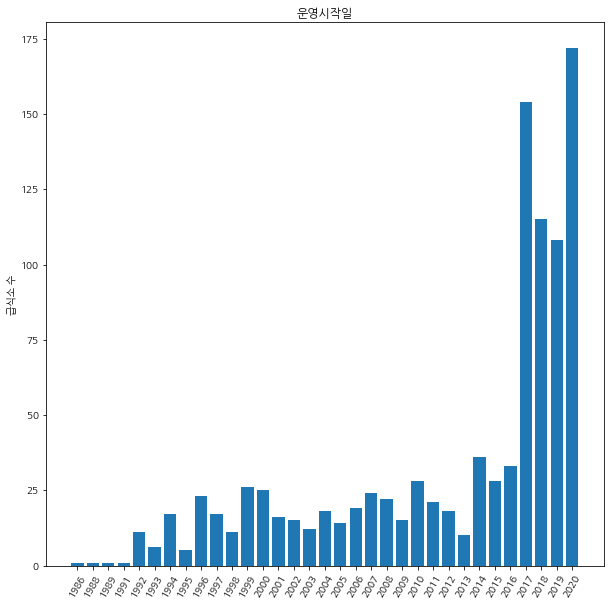

In [72]:
idx = df['운영시작'].unique()
idx.sort()
plt.figure(figsize = (10,10))
plt.xticks(rotation=60)
plt.bar(idx[1:], df['운영시작'].value_counts()[idx][1:])
plt.title('운영시작일')
plt.ylabel('급식소 수') ;

## 운영종료 시각화

- 운영종료또한 2020 년도가 매우 많다. 

<BarContainer object of 6 artists>

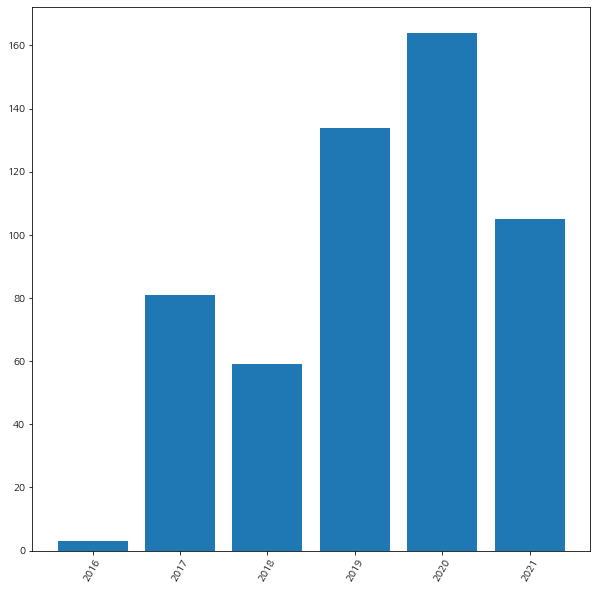

In [73]:
idx = df['운영종료년도'].unique()
idx.sort()
plt.figure(figsize = (10,10))
plt.xticks(rotation=60)
plt.bar(idx[1:], df['운영종료년도'].value_counts()[idx][1:] ) 

## 각 지역별 급식소 분포는 어떨까?

- 무료 급식소가 존재하는 지점을 점으로 표시하였다.
- 같은 급식소에 여러 단체가 같이 활동하는 경우가 있어 1,2,5 개의 가짓수가 나타났다. 그래서 Count 가 다르다.
- 지역별로 무료급식수가 많을수록 진한색을 띠게 된다.

In [380]:
%%HTML
<div class='tableauPlaceholder' id='viz1612987216762' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;7C&#47;7CDBRX2B9&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;7CDBRX2B9' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;7C&#47;7CDBRX2B9&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1612987216762');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>